<a href="https://colab.research.google.com/github/tharika01/ML-Projects/blob/main/binary_classification(breast_cancer_dataset)_using_tensorflow_and_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import*
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
pip show keras

Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
dataset = pd.read_csv('breast-cancer.csv')
print(dataset)
del dataset['Unnamed: 32']
print(dataset.shape)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
X[10]

array([1.602e+01, 2.324e+01, 1.027e+02, 7.978e+02, 8.206e-02, 6.669e-02,
       3.299e-02, 3.323e-02, 1.528e-01, 5.697e-02, 3.795e-01, 1.187e+00,
       2.466e+00, 4.051e+01, 4.029e-03, 9.269e-03, 1.101e-02, 7.591e-03,
       1.460e-02, 3.042e-03, 1.919e+01, 3.388e+01, 1.238e+02, 1.150e+03,
       1.181e-01, 1.551e-01, 1.459e-01, 9.975e-02, 2.948e-01, 8.452e-02])

In [ ]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

### Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y.shape)
print(y)

(569,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1

### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(114, 30)
(455, 30)
(455,)
(114,)


### Creating ANN model

Creating neural networks using sequential approach

1.   One input layer
2.   two hidden layers with 16, 32 neurons
3.   one output layer with one neuron



Bias initializer in keras framework in tensorflow

In [ ]:
model = Sequential()
weight_initializer = tf.keras.initializers.he_uniform()
bias_initializer = tf.keras.initializers.he_uniform()
model.add(Dense(4, input_dim = 31, kernel_initializer = weight_initializer, activation = "tanh", use_bias=True, bias_initializer=bias_initializer, name ="layer1"))
model.add(Dense(1, activation = 'sigmoid', name = 'layer_2'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 4)                 128       
                                                                 
 layer_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


get_weights()

In [ ]:
print("weights and biases of the layers before training the model")
for layer in model.layers:
  print(layer.name)
  print("weights")
  print("Shape: ", layer.get_weights()[0].shape, '\n', layer.get_weights()[0])
  print("Bias")
  print("Shape: ", layer.get_weights()[1].shape, '\n', layer.get_weights()[1])

weights and biases of the layers before training the model
layer1
weights
Shape:  (31, 4) 
 [[ 0.1110521   0.4017651   0.32693118  0.43915695]
 [ 0.01446751  0.38451654 -0.24355806 -0.1720559 ]
 [-0.04231888 -0.35134238  0.3772872   0.38415152]
 [ 0.28525    -0.26934385 -0.4043331   0.37711477]
 [-0.00539711 -0.00458863  0.19960225 -0.22176598]
 [-0.39031476 -0.10263622 -0.43285802  0.08790743]
 [ 0.29911262 -0.3455537  -0.2754087   0.20164424]
 [-0.26255357  0.36274898  0.2088005  -0.3165972 ]
 [ 0.09429598 -0.04779142 -0.3245354  -0.05303961]
 [ 0.3991292  -0.41472113  0.04534152 -0.01056287]
 [-0.3146819  -0.33344382  0.3924862  -0.35463804]
 [-0.08850843 -0.00747457  0.10244477  0.37184358]
 [ 0.30351424  0.43548256 -0.1573143   0.06992042]
 [-0.15630159 -0.0899317   0.38055104 -0.04581666]
 [-0.16460848 -0.11823002 -0.08595154 -0.19237848]
 [-0.03189752  0.20891207  0.4386323  -0.34855694]
 [ 0.08547062  0.35619557 -0.42270935  0.4151628 ]
 [-0.03046441  0.42110097  0.43488133  0.

### Visualising the initialised weights and biases

In [ ]:
from tensorflow.python.framework.tensor_spec import DenseSpec
inp = Input(shape=(30,))
bias_initializer = tf.keras.initializers.he_uniform()

x1 = Dense(16, kernel_initializer='he_uniform', activation = "tanh", use_bias=True, bias_initializer=bias_initializer, name='layer1')(inp)
x2 = Dense(32, kernel_initializer='he_uniform', activation="tanh", use_bias=True, bias_initializer="zero", name='layer2')(x1)
out = Dense(1, kernel_initializer='he_uniform', activation="sigmoid")(x2)

model = Model(inputs=inp, outputs=out)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 layer1 (Dense)              (None, 16)                496       
                                                                 
 layer2 (Dense)              (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


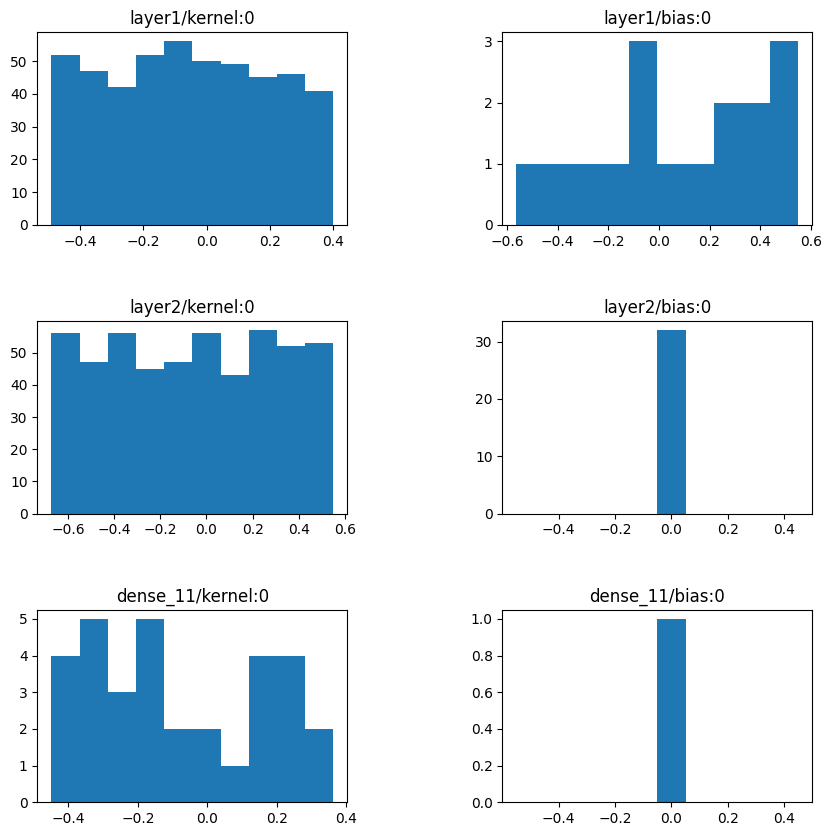

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]
for i , layer in enumerate(weight_layers):
  for j in [0, 1]:
    axes[i, j].hist(layer.weights[j].numpy().flatten(), align = 'left')
    axes[i, j].set_title(layer.weights[j].name)

Method 1 :Sequential Model

In [ ]:
model_ann1 = Sequential()
model_ann1.add(Dense(16, input_dim=30, kernel_initializer='he_uniform', activation="tanh"))
model_ann1.add(Dense(32, kernel_initializer='he_uniform', activation="tanh"))
model_ann1.add(Dense(1, kernel_initializer='he_uniform', activation = "sigmoid"))
model_ann1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                496       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


Compile and train the model

In [ ]:
model_ann1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

history_ann = model_ann1.fit(X_train, y_train, epochs = 10, batch_size=4, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
114/114 [==============================] - 1s 4ms/step - loss: 0.3810 - accuracy: 0.8308 - val_loss: 0.2101 - val_accuracy: 0.9123
Epoch 2/10
114/114 [==============================] - 0s 4ms/step - loss: 0.1788 - accuracy: 0.9451 - val_loss: 0.1510 - val_accuracy: 0.9298
Epoch 3/10
114/114 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.9582 - val_loss: 0.1246 - val_accuracy: 0.9386
Epoch 4/10
114/114 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9670 - val_loss: 0.1078 - val_accuracy: 0.9649
Epoch 5/10
114/114 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9670 - val_loss: 0.0963 - val_accuracy: 0.9561
Epoch 6/10
114/114 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9670 - val_loss: 0.0876 - val_accuracy: 0.9649
Epoch 7/10
114/114 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9736 - val_loss: 0.0811 - val_accuracy: 0.9649
Epoch 

Visualization of training accuracy and loss of the model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'loss')

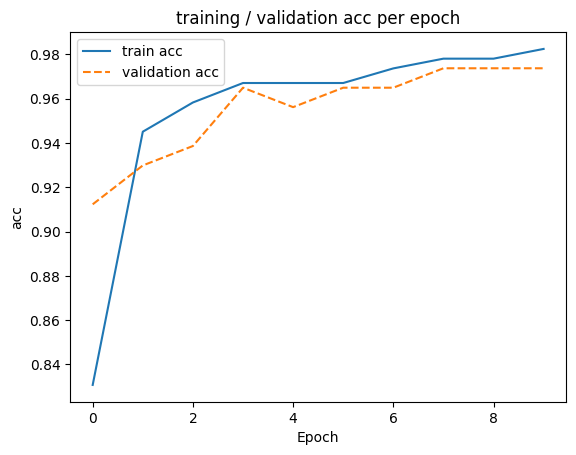

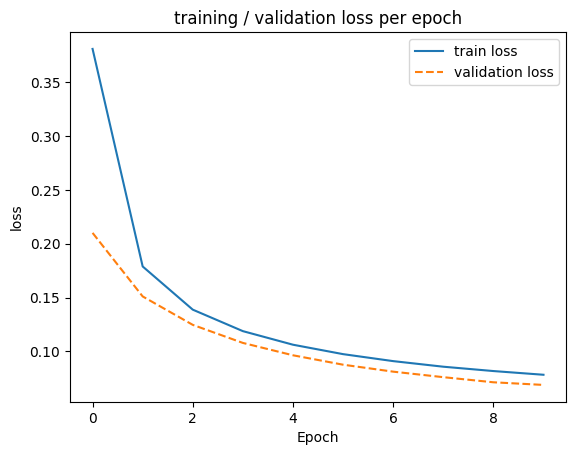

In [ ]:
print(history_ann.history.keys())

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(history_ann.history['accuracy'])
ax.plot(history_ann.history['val_accuracy'], '--')
ax.legend(['train acc', 'validation acc'])
ax.set_title('training / validation acc per epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

print(history_ann.history.keys())

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot(history_ann.history['loss'])
ax.plot(history_ann.history['val_loss'], '--')
ax.legend(['train loss', 'validation loss'])
ax.set_title('training / validation loss per epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')

Model Evaluation

In [ ]:
score = model_ann1.evaluate(X_test, y_test, verbose=0)
print('test loss:', score[0])
print('Test accuracy:', score[1])

test loss: 0.0687604621052742
Test accuracy: 0.9736841917037964


Model Prediction

In [ ]:
y_pred = model_ann1.predict(X_test)
#thresholding rule
y_pred=np.where(y_pred>0.5,1,0)
print(y_pred.shape)
print(y_pred)

4/4 [==============================] - 0s 1ms/step
(114, 1)
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]


Performance Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Performance Metrics :")
metrics=classification_report(y_test, y_pred)
print(metrics)
print("confusion matrix:")
CM = confusion_matrix(y_test, y_pred)
print(CM)

Performance Metrics :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

confusion matrix:
[[67  0]
 [ 3 44]]


### Comparison

In [ ]:
calculation = pd.DataFrame(np.c_[y_test, y_pred], columns=["Original", "Predict"])
calculation

,Original,Predict
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
109,1,1
110,0,0
111,1,1
112,1,1


### Method-2:Implementation from Scikit library

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(16,32),
                        max_iter = 10, activation = "tanh",
                        solver = 'sgd')
mlp_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(16, 32), max_iter=10,
              solver='sgd')

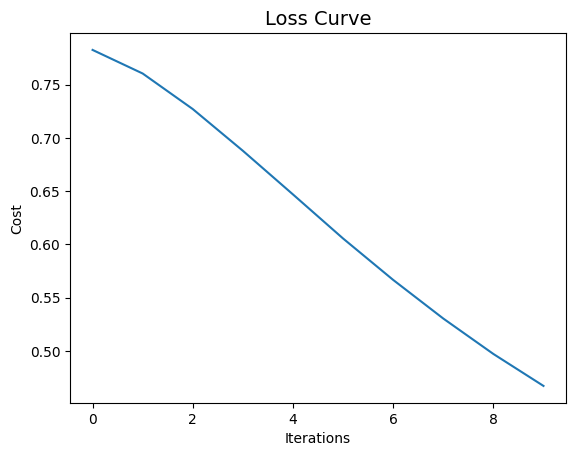

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
y_pred_sk = mlp_clf.predict(X_test)
print(y_pred_sk)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0]


In [ ]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
calculation2 = pd.DataFrame(np.c_[y_test, y_pred_sk], columns=["Original", "Predict"])
calculation2

,Original,Predict
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
109,1,0
110,0,1
111,1,1
112,1,1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Performance Metrics:')
metrics=classification_report(y_test, y_pred_sk)
print(metrics)
print("Confusion Matrix:")
CM = confusion_matrix(y_test, y_pred_sk)
print(CM)

Performance Metrics:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        67
           1       0.92      0.72      0.81        47

    accuracy                           0.86       114
   macro avg       0.88      0.84      0.85       114
weighted avg       0.87      0.86      0.86       114

Confusion Matrix:
[[64  3]
 [13 34]]


### Comparison between SK Learn and DNN DL Library

In [ ]:
calculation3 = pd.DataFrame(np.c_[y_test, y_pred, y_pred_sk], columns=["Original", "ANN Predict", "Sk Predict"])
calculation3

,Original,ANN Predict,Sk Predict
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
109,1,1,0
110,0,0,1
111,1,1,1
112,1,1,1
